In [1]:
%load_ext autoreload
%autoreload 2

## loading the model

In [2]:
from gaze import init, ML
args = init(no_cuda=True, batch_size=64, verbose=0)
ml = ML(args)
path = '_Regard.pt'
ml.train(path=path)

Loading file _Regard.pt


In [3]:
ml.device

device(type='cpu')

## running the forward model on the extracted faces

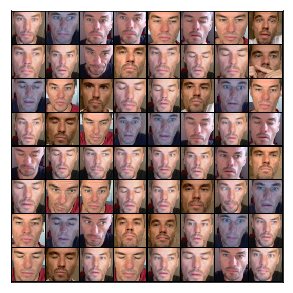

In [4]:
%matplotlib inline
fig, ax =  ml.dataset.show()

In [5]:
for batch_idx, (data, target) in enumerate(ml.dataset.train_loader):
    data, target = data.to(ml.device), target.to(ml.device)
    output = ml.model(data)

## testing the model

In [6]:
Accuracy = ml.test()
print('Accuracy={:.1f}%'.format(Accuracy*100))


Test set: Average loss: 0.2230, Accuracy: 213/222 (95%)

Accuracy=95.9%


In [7]:
data, labels = next(iter(ml.dataset.train_loader))
print(' '.join('%5s' % ml.dataset.dataset.classes[labels[j]] for j in range(ml.args.batch_size)))

 left right blink center center center center blink right center blink  left right center center right  left right center  left blink right right center  left center blink  left  left  left blink blink center right right center right center center right  left  left blink  left  left  left  left right center center right blink blink blink  left blink  left right blink center center center right blink


In [8]:
fig, ax = ml.show(only_wrong=True)

In [9]:
fig, ax = ml.show(only_wrong=False)

## cross-validation

In [10]:
args = init(verbose=0, log_interval=0, epochs=20)
from gaze import MetaML
mml = MetaML(args)
Accuracy = mml.protocol(args, 42)
print('Accuracy', Accuracy[:-1].mean(), '+/-', Accuracy[:-1].std())

Accuracy 0.9457207207207208 +/- 0.042721016143761045


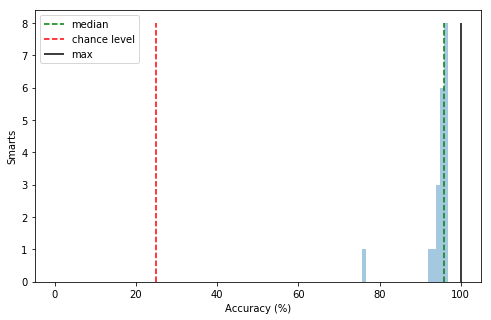

<Figure size 432x288 with 0 Axes>

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=((8, 5)))
n, bins, patches = ax.hist(Accuracy[:-1]*100, bins=np.linspace(0, 100, 100), alpha=.4)
ax.vlines(np.median(Accuracy[:-1])*100, 0, n.max(), 'g', linestyles='dashed', label='median')
ax.vlines(25, 0, n.max(), 'r', linestyles='dashed', label='chance level')
ax.vlines(100, 0, n.max(), 'k', label='max')
ax.set_xlabel('Accuracy (%)')
ax.set_ylabel('Smarts')
ax.legend(loc='best')
plt.show() 
fname = 'accuracy'
for ext in ['.pdf', '.png']:
    plt.savefig(fname + ext)